# Machine Learning Term Project - Customer Segmentation
## Supervised learning
### Mohsin Mohammed

In [1]:
# Lets import all our dependencies:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


Lets go ahead and import our train set:

In [2]:
train_url = "https://raw.githubusercontent.com/momokamalz/MachineLearning/main/TermProject/Train.csv"

train_data = pd.read_csv(train_url, sep=',')
# Take a quick look at the train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


### lets look at our dataframe

In [3]:
train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
train_data.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


The describe method is being used to learn that 75% of our population is under 53 years of age and 25% of our population under 30 

## Data Visiualization

### Lets plot the age demographic of our customer base:

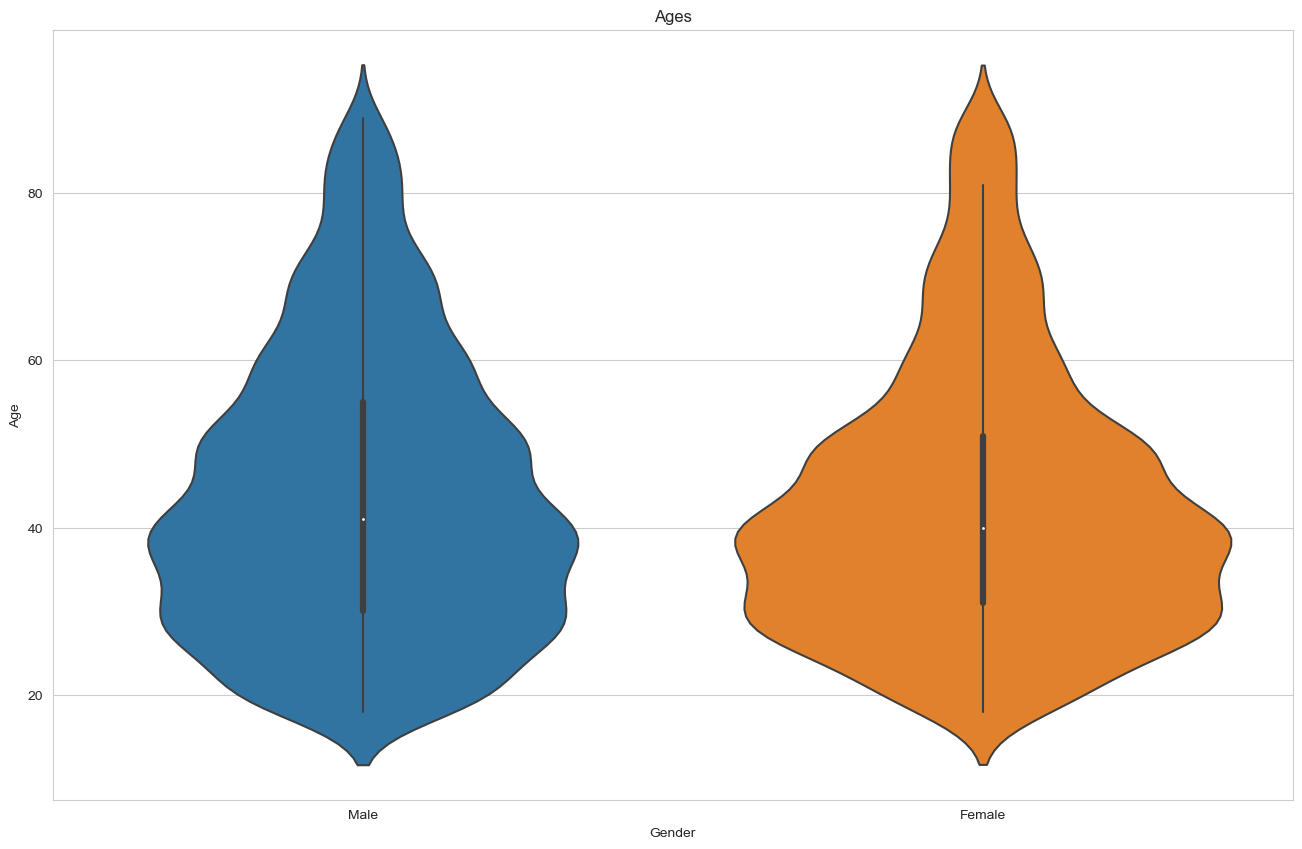

In [5]:

sns.set_style('whitegrid')
plt.figure(figsize=(16,10))
plt.title("Ages")
sns.violinplot(x=train_data.Gender, y=train_data.Age)
plt.savefig('violin.png', bbox_inches='tight')
plt.show()


The violin plots demonstrates that we have more female population in our customer database than males.
Majority of the shoppers seem to belong between age 30 - 50 years,

Lets Create bins and divide the age for a better representation of the age distribution

In [6]:
def max_min_age(df):      #calculating the minimum age and the maximum age
    return (min(df.Age), max(df.Age))

max_min_age(train_data)

(18, 89)

The minimum age is 18 and the max age is 89. Lets plot a barplot by dividing them into age groups:

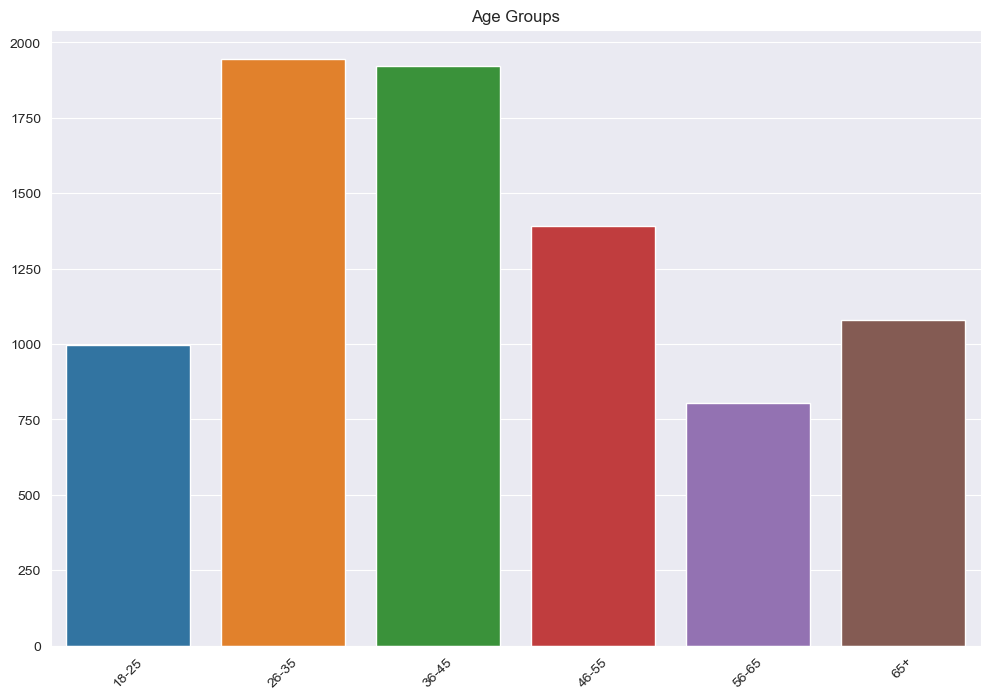

In [7]:
def plot_ages(data):
    
    age_1 = data[(data['Age'] >= 18) & (data['Age'] <=25)]
    age_2 = data[(data['Age'] >= 26) & (data['Age'] <=35)]
    age_3 = data[(data['Age'] >= 36) & (data['Age'] <=45)]
    age_4 = data[(data['Age'] >= 46) & (data['Age'] <=55)]
    age_5 = data[(data['Age'] >= 56) & (data['Age'] <=65)]    
    age_6 = data[(data['Age'] >= 65)]
    
    
    x = ["18-25", "26-35", "36-45", "46-55", "56-65", "65+"]
    y = [len(age_1), len(age_2), len(age_3), len(age_4), len(age_5), len(age_6)]
    
    
    sns.set_style("darkgrid")
    plt.figure(figsize=(12,8))
    plt.title("Age Groups")
    sns.barplot(x=x, y=y)
    plt.xticks(rotation=45)
    plt.savefig('Age_distribution.png', bbox_inches='tight')
    plt.show()
    
plot_ages(train_data)
    
    

### Let's use a box plot to understand the distribution of the family size

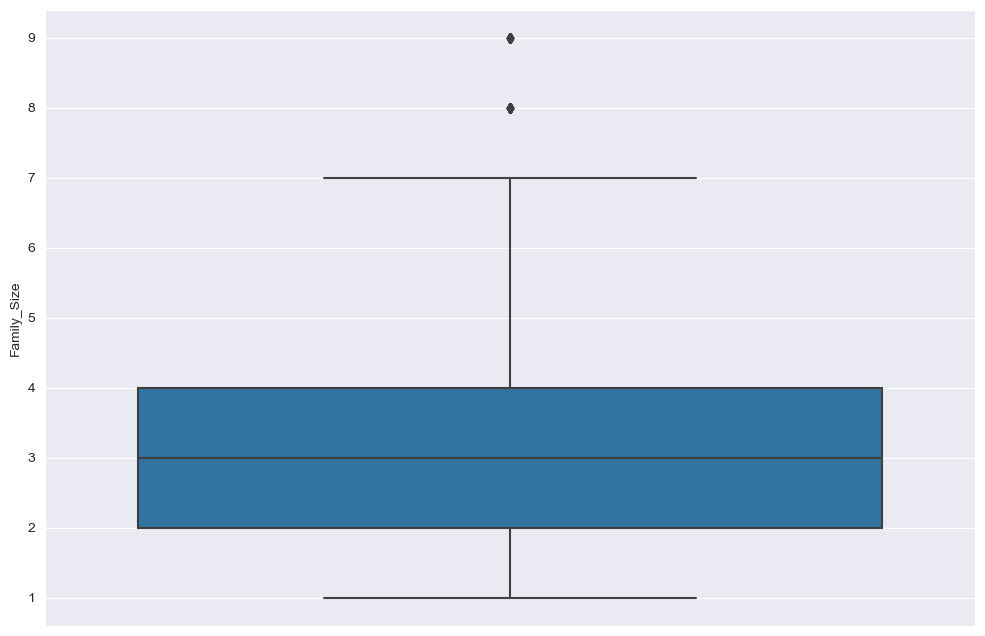

In [8]:
plt.figure(figsize=(12,8))
sns.boxplot(y=train_data["Family_Size"])
plt.savefig('family_size.png', bbox_inches='tight')
plt.show()

Looks like 75% of the customers have 4 people per household and an average household family has 3 people. There are some outliers which denote some households that have 8 or 9 people per household.

## Feature Engineering

Lets see the relationship between other variables but we have to encode them first 


In [9]:
def spending_score_encoder(df):      # encoding the spending score to reflect the weights with 1 being lowest and 3 being the highest
    key = {'Low': 1, 'Average': 2, 'High': 3}
    df.Spending_Score = df.Spending_Score.map(key)
    return df

spending_score_encoder(train_data)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,1,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,2,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,1,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,3,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,3,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,1,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,1,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,1,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,1,4.0,Cat_6,B


### Lets go ahead and encode the other  categorical features and replace their missing values with the most occuring elements

In [10]:
def encode(df):
    
    key={'Yes': 1, 'No': 0}
    grad_key = {'Yes': 1, 'No': 0}
    gender_key = {'Male': 0, 'Female': 1}
    
    
    df.Gender = df.Gender.map(gender_key)
   
    df.Graduated.fillna(df.Graduated.mode()[0], inplace=True)
    df.Graduated = df.Graduated.map(grad_key)
    
    df.Profession.fillna(df.Profession.mode()[0], inplace=True)
    df.Var_1.fillna(df.Var_1.mode()[0], inplace=True)
    
    df.Ever_Married.fillna(df.Ever_Married.mode()[0], inplace=True)
    df.Ever_Married = df.Ever_Married.map(key)
    return df

encode(train_data)
    

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,0,0,22,0,Healthcare,1.0,1,4.0,Cat_4,D
1,462643,1,1,38,1,Engineer,NaN,2,3.0,Cat_4,A
2,466315,1,1,67,1,Engineer,1.0,1,1.0,Cat_6,B
3,461735,0,1,67,1,Lawyer,0.0,3,2.0,Cat_6,B
4,462669,1,1,40,1,Entertainment,NaN,3,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,0,0,22,0,Artist,0.0,1,7.0,Cat_1,D
8064,464685,0,0,35,0,Executive,3.0,1,4.0,Cat_4,D
8065,465406,1,0,33,1,Healthcare,1.0,1,1.0,Cat_6,D
8066,467299,1,0,27,1,Healthcare,1.0,1,4.0,Cat_6,B


In [11]:
train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,0,0,22,0,Healthcare,1.0,1,4.0,Cat_4,D
1,462643,1,1,38,1,Engineer,NaN,2,3.0,Cat_4,A
2,466315,1,1,67,1,Engineer,1.0,1,1.0,Cat_6,B
3,461735,0,1,67,1,Lawyer,0.0,3,2.0,Cat_6,B
4,462669,1,1,40,1,Entertainment,NaN,3,6.0,Cat_6,A


## More data Cleaning:

Lets check how many more missing values we have and impute them

In [12]:
train_data.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1                0
Segmentation         0
dtype: int64

### Lets impute the numerical and categorical missing values:

In [13]:
def replace_num_missing_values(dataframe):
    numerical_data_cols = dataframe.select_dtypes(include=[np.number]).columns
    print(f"Replacing the missing values from these numerical column attributes: {numerical_data_cols.tolist()}")
    for col in numerical_data_cols:
        dataframe[col].fillna(dataframe[col].mean(), inplace=True)
    return dataframe

replace_num_missing_values(train_data)

Replacing the missing values from these numerical column attributes: ['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience', 'Spending_Score', 'Family_Size']


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,0,0,22,0,Healthcare,1.000000,1,4.0,Cat_4,D
1,462643,1,1,38,1,Engineer,2.641663,2,3.0,Cat_4,A
2,466315,1,1,67,1,Engineer,1.000000,1,1.0,Cat_6,B
3,461735,0,1,67,1,Lawyer,0.000000,3,2.0,Cat_6,B
4,462669,1,1,40,1,Entertainment,2.641663,3,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,0,0,22,0,Artist,0.000000,1,7.0,Cat_1,D
8064,464685,0,0,35,0,Executive,3.000000,1,4.0,Cat_4,D
8065,465406,1,0,33,1,Healthcare,1.000000,1,1.0,Cat_6,D
8066,467299,1,0,27,1,Healthcare,1.000000,1,4.0,Cat_6,B


In [14]:
train_data.isnull().sum()   # Checking the missing values

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

### Lets impute the categorical values 

In [15]:
data_encoded = pd.get_dummies(train_data, columns=['Profession'])
data_encoded

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,462809,0,0,22,0,1.000000,1,4.0,Cat_4,D,0,0,0,0,0,1,0,0,0
1,462643,1,1,38,1,2.641663,2,3.0,Cat_4,A,0,0,1,0,0,0,0,0,0
2,466315,1,1,67,1,1.000000,1,1.0,Cat_6,B,0,0,1,0,0,0,0,0,0
3,461735,0,1,67,1,0.000000,3,2.0,Cat_6,B,0,0,0,0,0,0,0,1,0
4,462669,1,1,40,1,2.641663,3,6.0,Cat_6,A,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,0,0,22,0,0.000000,1,7.0,Cat_1,D,1,0,0,0,0,0,0,0,0
8064,464685,0,0,35,0,3.000000,1,4.0,Cat_4,D,0,0,0,0,1,0,0,0,0
8065,465406,1,0,33,1,1.000000,1,1.0,Cat_6,D,0,0,0,0,0,1,0,0,0
8066,467299,1,0,27,1,1.000000,1,4.0,Cat_6,B,0,0,0,0,0,1,0,0,0


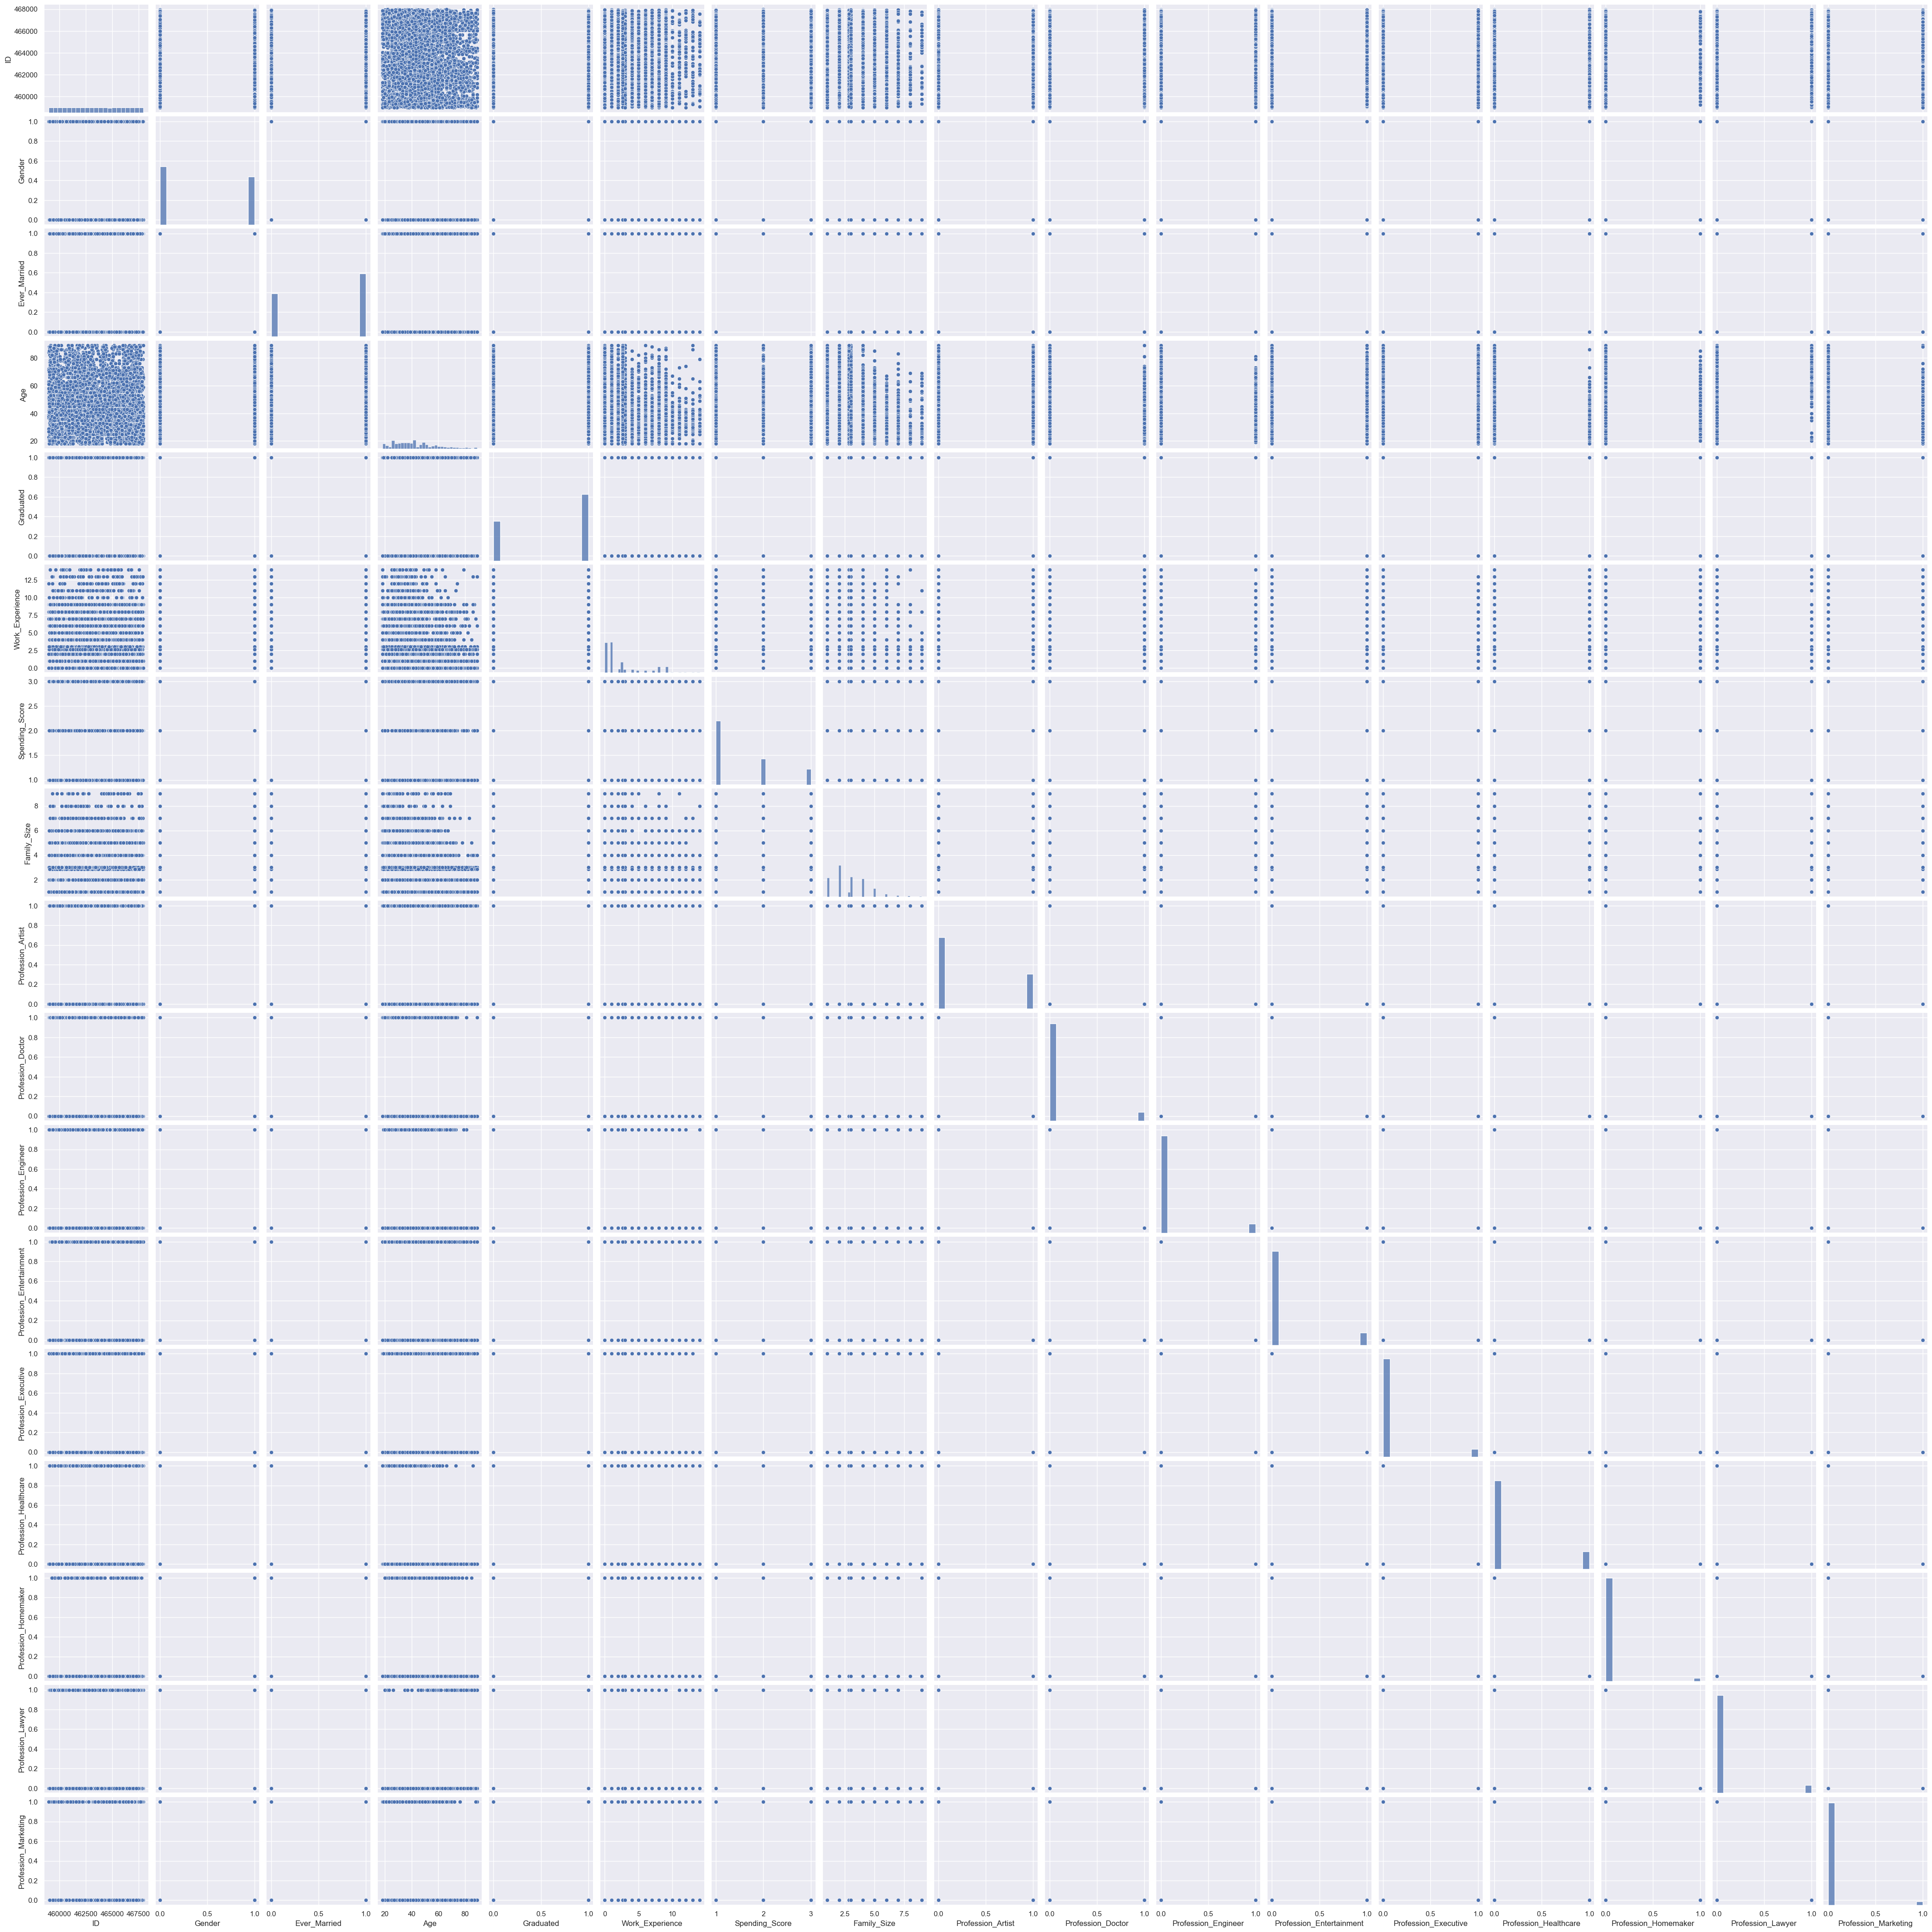

In [16]:
sns.set(style="darkgrid", color_codes=True)
sns.pairplot(data_encoded)
plt.show()

Looks like there is a high corelation between 'Age' and 'Family_Size' and also 'Age'  and 'Work_Experience' We will also ignore the correlation for 'ID' column since it is merely a unique identification number.

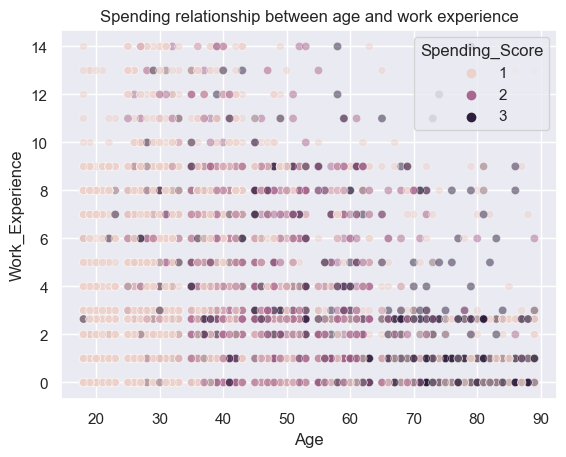

In [17]:
sns.scatterplot(x=data_encoded['Age'], y=data_encoded['Work_Experience'], alpha=0.5, hue=data_encoded.Spending_Score)
plt.title("Spending relationship between age and work experience")
plt.savefig("age_exp_spending_score.png", bbox_inches='tight')
plt.show()

It looks like people tend to have a better spending score as they get older. We can clearly see that people upto approximately 30 years of age have  predominantly lower spending scores. 

This allows us the opportunity to offer more products and services to people between the age group of 35 to 80 and having upto 8 years of work experience.

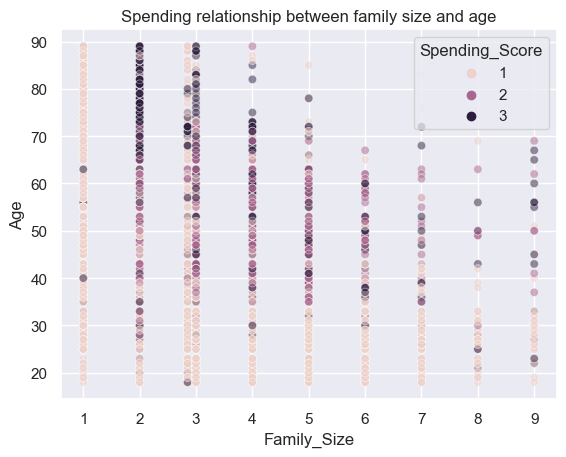

In [18]:
sns.scatterplot(x=data_encoded['Family_Size'], y=data_encoded['Age'], alpha=0.5, hue=data_encoded.Spending_Score)
plt.title("Spending relationship between family size and age")
plt.savefig("age_fam_spending_score.png", bbox_inches='tight')
plt.show()

Family size between 2 - 4 spend the highest and the older the family members the more they spend

### Lets import ther test set and analyze it:

In [19]:
test_url = "https://raw.githubusercontent.com/momokamalz/MachineLearning/main/TermProject/Test.csv"
test_data = pd.read_csv(test_url)
test_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [20]:
# The test does not have the target column and we have to predict it by training a classifier on the training set

### Data preprocessing on the test set:
Let's format the test set so that it can be combined with the train set to look for any data leak

In [21]:
spending_score_encoder(test_data)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,1,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,2,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,1,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,3,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,1,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,1,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,1,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,1,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,3,5.0,Cat_4


In [22]:
encode(test_data)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,1,1,36,1,Engineer,0.0,1,1.0,Cat_6
1,458994,0,1,37,1,Healthcare,8.0,2,4.0,Cat_6
2,458996,1,1,69,0,Artist,0.0,1,1.0,Cat_6
3,459000,0,1,59,0,Executive,11.0,3,2.0,Cat_6
4,459001,1,0,19,0,Marketing,NaN,1,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,0,0,29,0,Healthcare,9.0,1,4.0,Cat_6
2623,467958,1,0,35,1,Doctor,1.0,1,1.0,Cat_6
2624,467960,1,0,53,1,Entertainment,NaN,1,2.0,Cat_6
2625,467961,0,1,47,1,Executive,1.0,3,5.0,Cat_4


In [23]:
replace_num_missing_values(test_data)

Replacing the missing values from these numerical column attributes: ['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience', 'Spending_Score', 'Family_Size']


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,1,1,36,1,Engineer,0.000000,1,1.0,Cat_6
1,458994,0,1,37,1,Healthcare,8.000000,2,4.0,Cat_6
2,458996,1,1,69,0,Artist,0.000000,1,1.0,Cat_6
3,459000,0,1,59,0,Executive,11.000000,3,2.0,Cat_6
4,459001,1,0,19,0,Marketing,2.552587,1,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,0,0,29,0,Healthcare,9.000000,1,4.0,Cat_6
2623,467958,1,0,35,1,Doctor,1.000000,1,1.0,Cat_6
2624,467960,1,0,53,1,Entertainment,2.552587,1,2.0,Cat_6
2625,467961,0,1,47,1,Executive,1.000000,3,5.0,Cat_4


Lets' not forget to create the dummies for the Profession column in the test set as well

In [24]:
test_encoded = pd.get_dummies(test_data, columns=['Profession'])
test_encoded

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,458989,1,1,36,1,0.000000,1,1.0,Cat_6,0,0,1,0,0,0,0,0,0
1,458994,0,1,37,1,8.000000,2,4.0,Cat_6,0,0,0,0,0,1,0,0,0
2,458996,1,1,69,0,0.000000,1,1.0,Cat_6,1,0,0,0,0,0,0,0,0
3,459000,0,1,59,0,11.000000,3,2.0,Cat_6,0,0,0,0,1,0,0,0,0
4,459001,1,0,19,0,2.552587,1,4.0,Cat_6,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,0,0,29,0,9.000000,1,4.0,Cat_6,0,0,0,0,0,1,0,0,0
2623,467958,1,0,35,1,1.000000,1,1.0,Cat_6,0,1,0,0,0,0,0,0,0
2624,467960,1,0,53,1,2.552587,1,2.0,Cat_6,0,0,0,1,0,0,0,0,0
2625,467961,0,1,47,1,1.000000,3,5.0,Cat_4,0,0,0,0,1,0,0,0,0


In [25]:
# Check for missing values in the test set:
test_encoded.isnull().sum()

ID                          0
Gender                      0
Ever_Married                0
Age                         0
Graduated                   0
Work_Experience             0
Spending_Score              0
Family_Size                 0
Var_1                       0
Profession_Artist           0
Profession_Doctor           0
Profession_Engineer         0
Profession_Entertainment    0
Profession_Executive        0
Profession_Healthcare       0
Profession_Homemaker        0
Profession_Lawyer           0
Profession_Marketing        0
dtype: int64

No more missing values in the test set as well and both sets have been preprocessed. So lets combine the two and check for duplicate customer 'ID' 

In [26]:
combined_data = pd.concat([data_encoded, test_encoded])
combined_data

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,462809,0,0,22,0,1.000000,1,4.0,Cat_4,D,0,0,0,0,0,1,0,0,0
1,462643,1,1,38,1,2.641663,2,3.0,Cat_4,A,0,0,1,0,0,0,0,0,0
2,466315,1,1,67,1,1.000000,1,1.0,Cat_6,B,0,0,1,0,0,0,0,0,0
3,461735,0,1,67,1,0.000000,3,2.0,Cat_6,B,0,0,0,0,0,0,0,1,0
4,462669,1,1,40,1,2.641663,3,6.0,Cat_6,A,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,0,0,29,0,9.000000,1,4.0,Cat_6,NaN,0,0,0,0,0,1,0,0,0
2623,467958,1,0,35,1,1.000000,1,1.0,Cat_6,NaN,0,1,0,0,0,0,0,0,0
2624,467960,1,0,53,1,2.552587,1,2.0,Cat_6,NaN,0,0,0,1,0,0,0,0,0
2625,467961,0,1,47,1,1.000000,3,5.0,Cat_4,NaN,0,0,0,0,1,0,0,0,0


In [27]:
# lets take a look at the merged data's missing values:
combined_data.isnull().sum()

ID                             0
Gender                         0
Ever_Married                   0
Age                            0
Graduated                      0
Work_Experience                0
Spending_Score                 0
Family_Size                    0
Var_1                          0
Segmentation                2627
Profession_Artist              0
Profession_Doctor              0
Profession_Engineer            0
Profession_Entertainment       0
Profession_Executive           0
Profession_Healthcare          0
Profession_Homemaker           0
Profession_Lawyer              0
Profession_Marketing           0
dtype: int64

In [28]:
combined_data.shape

(10695, 19)

### Checking data leak based on unique customer id

In [29]:
combined_data.ID.duplicated().sum()

2332

looks like we have 2332 duplicate ID instances which need to be deleted. We can only have one unique ID for a customer 

In [30]:
combined_data = combined_data.drop_duplicates(subset="ID", keep="first") # DELETING THE ID DUPLICATES

In [31]:
combined_data.shape

(8363, 19)

Since we know for a fact that our test data did not come with a Segmentation column, it can easily be deduced that these 295 missing instamces are from the test set and will make up our test set as such. So lets go ahead and seperate the test set from the combined data now: 

In [32]:
test_data = combined_data[combined_data['Segmentation'].isnull()]

In [33]:
test_data.shape

(295, 19)

In [34]:
test_data.isnull().sum()

ID                            0
Gender                        0
Ever_Married                  0
Age                           0
Graduated                     0
Work_Experience               0
Spending_Score                0
Family_Size                   0
Var_1                         0
Segmentation                295
Profession_Artist             0
Profession_Doctor             0
Profession_Engineer           0
Profession_Entertainment      0
Profession_Executive          0
Profession_Healthcare         0
Profession_Homemaker          0
Profession_Lawyer             0
Profession_Marketing          0
dtype: int64

In [35]:
new_train = combined_data[combined_data['Segmentation'].notnull()] # delete all rows where segmentation is nan

In [36]:
new_train.shape

(8068, 19)

In [37]:
new_train

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,462809,0,0,22,0,1.000000,1,4.0,Cat_4,D,0,0,0,0,0,1,0,0,0
1,462643,1,1,38,1,2.641663,2,3.0,Cat_4,A,0,0,1,0,0,0,0,0,0
2,466315,1,1,67,1,1.000000,1,1.0,Cat_6,B,0,0,1,0,0,0,0,0,0
3,461735,0,1,67,1,0.000000,3,2.0,Cat_6,B,0,0,0,0,0,0,0,1,0
4,462669,1,1,40,1,2.641663,3,6.0,Cat_6,A,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,0,0,22,0,0.000000,1,7.0,Cat_1,D,1,0,0,0,0,0,0,0,0
8064,464685,0,0,35,0,3.000000,1,4.0,Cat_4,D,0,0,0,0,1,0,0,0,0
8065,465406,1,0,33,1,1.000000,1,1.0,Cat_6,D,0,0,0,0,0,1,0,0,0
8066,467299,1,0,27,1,1.000000,1,4.0,Cat_6,B,0,0,0,0,0,1,0,0,0


In [38]:
new_train.isnull().sum()

ID                          0
Gender                      0
Ever_Married                0
Age                         0
Graduated                   0
Work_Experience             0
Spending_Score              0
Family_Size                 0
Var_1                       0
Segmentation                0
Profession_Artist           0
Profession_Doctor           0
Profession_Engineer         0
Profession_Entertainment    0
Profession_Executive        0
Profession_Healthcare       0
Profession_Homemaker        0
Profession_Lawyer           0
Profession_Marketing        0
dtype: int64

In [39]:
new_train = new_train.drop("Var_1", axis=1)   # dropping the 'Var_1' column as it adds no value

In [40]:
new_train.shape

(8068, 18)

In [41]:
#Let's encode the target column 'Segmentation'
key = {'A': 0, 'B':1, 'C': 2, 'D': 3}
new_train['Segmentation'] = new_train['Segmentation'].map(key)
new_train

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,462809,0,0,22,0,1.000000,1,4.0,3,0,0,0,0,0,1,0,0,0
1,462643,1,1,38,1,2.641663,2,3.0,0,0,0,1,0,0,0,0,0,0
2,466315,1,1,67,1,1.000000,1,1.0,1,0,0,1,0,0,0,0,0,0
3,461735,0,1,67,1,0.000000,3,2.0,1,0,0,0,0,0,0,0,1,0
4,462669,1,1,40,1,2.641663,3,6.0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,0,0,22,0,0.000000,1,7.0,3,1,0,0,0,0,0,0,0,0
8064,464685,0,0,35,0,3.000000,1,4.0,3,0,0,0,0,1,0,0,0,0
8065,465406,1,0,33,1,1.000000,1,1.0,3,0,0,0,0,0,1,0,0,0
8066,467299,1,0,27,1,1.000000,1,4.0,1,0,0,0,0,0,1,0,0,0


In [42]:
test_data_v1 = test_data.drop(["Segmentation", "Var_1"], axis=1)
test_data_v1

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
6,459005,0,1,61,1,5.000000,1,3.0,0,1,0,0,0,0,0,0,0
19,459045,1,1,88,1,1.000000,2,4.0,0,0,0,0,0,0,0,1,0
32,459090,0,0,31,0,1.000000,1,2.0,1,0,0,0,0,0,0,0,0
38,459116,0,1,60,1,2.000000,2,5.0,1,0,0,0,0,0,0,0,0
43,459121,1,1,51,1,3.000000,2,6.0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,467913,0,1,48,1,3.000000,1,1.0,1,0,0,0,0,0,0,0,0
2612,467930,0,1,45,1,4.000000,2,2.0,0,0,0,1,0,0,0,0,0
2616,467938,0,1,46,1,5.000000,1,1.0,0,0,0,1,0,0,0,0,0
2624,467960,1,0,53,1,2.552587,1,2.0,0,0,0,1,0,0,0,0,0


In [43]:
test_data_v1.shape

(295, 17)

In [44]:
new_train.shape

(8068, 18)

In [45]:
new_train

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,462809,0,0,22,0,1.000000,1,4.0,3,0,0,0,0,0,1,0,0,0
1,462643,1,1,38,1,2.641663,2,3.0,0,0,0,1,0,0,0,0,0,0
2,466315,1,1,67,1,1.000000,1,1.0,1,0,0,1,0,0,0,0,0,0
3,461735,0,1,67,1,0.000000,3,2.0,1,0,0,0,0,0,0,0,1,0
4,462669,1,1,40,1,2.641663,3,6.0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,0,0,22,0,0.000000,1,7.0,3,1,0,0,0,0,0,0,0,0
8064,464685,0,0,35,0,3.000000,1,4.0,3,0,0,0,0,1,0,0,0,0
8065,465406,1,0,33,1,1.000000,1,1.0,3,0,0,0,0,0,1,0,0,0
8066,467299,1,0,27,1,1.000000,1,4.0,1,0,0,0,0,0,1,0,0,0


# Feature Scaling:

In [46]:
scaler = StandardScaler()
X = new_train.drop("Segmentation", axis=1)
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [47]:
X_scaled

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,-0.258250,-0.909164,-1.206653,-1.284623,-1.29219,-0.508763,-0.736833,0.767001,-0.697400,-0.305328,-0.307988,-0.365110,-0.283193,2.248790,-0.177341,-0.289276,-0.193782
1,-0.322213,1.099912,0.828738,-0.327151,0.77388,0.000000,0.612411,0.099972,-0.697400,-0.305328,3.246876,-0.365110,-0.283193,-0.444684,-0.177341,-0.289276,-0.193782
2,1.092695,1.099912,0.828738,1.408268,0.77388,-0.508763,-0.736833,-1.234085,-0.697400,-0.305328,3.246876,-0.365110,-0.283193,-0.444684,-0.177341,-0.289276,-0.193782
3,-0.672087,-0.909164,0.828738,1.408268,0.77388,-0.818671,1.961655,-0.567056,-0.697400,-0.305328,-0.307988,-0.365110,-0.283193,-0.444684,-0.177341,3.456912,-0.193782
4,-0.312195,1.099912,0.828738,-0.207467,0.77388,0.000000,1.961655,2.101059,-0.697400,-0.305328,-0.307988,2.738901,-0.283193,-0.444684,-0.177341,-0.289276,-0.193782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,0.207607,-0.909164,-1.206653,-1.284623,-1.29219,-0.818671,-0.736833,2.768088,1.433897,-0.305328,-0.307988,-0.365110,-0.283193,-0.444684,-0.177341,-0.289276,-0.193782
8064,0.464618,-0.909164,-1.206653,-0.506677,-1.29219,0.111051,-0.736833,0.767001,-0.697400,-0.305328,-0.307988,-0.365110,3.531163,-0.444684,-0.177341,-0.289276,-0.193782
8065,0.742436,1.099912,-1.206653,-0.626361,0.77388,-0.508763,-0.736833,-1.234085,-0.697400,-0.305328,-0.307988,-0.365110,-0.283193,2.248790,-0.177341,-0.289276,-0.193782
8066,1.471854,1.099912,-1.206653,-0.985413,0.77388,-0.508763,-0.736833,0.767001,-0.697400,-0.305328,-0.307988,-0.365110,-0.283193,2.248790,-0.177341,-0.289276,-0.193782


lets Scale the test data as well:

In [48]:
test_scaler = StandardScaler()
test_scaled = pd.DataFrame(test_scaler.fit_transform(test_data_v1), columns=test_data_v1.columns)
test_scaled

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,-1.638085,-0.906084,0.869455,1.110490,0.771100,0.855865,-0.714204,0.095083,-0.694559,3.286335,-0.276844,-0.384526,-0.214707,-0.451754,-0.166957,-0.310893,-0.254916
1,-1.622978,1.103651,0.869455,2.684624,0.771100,-0.519061,0.653914,0.738837,-0.694559,-0.304290,-0.276844,-0.384526,-0.214707,-0.451754,-0.166957,3.216544,-0.254916
2,-1.605982,-0.906084,-1.150145,-0.638547,-1.296849,-0.519061,-0.714204,-0.548672,1.439763,-0.304290,-0.276844,-0.384526,-0.214707,-0.451754,-0.166957,-0.310893,-0.254916
3,-1.596162,-0.906084,0.869455,1.052189,0.771100,-0.175329,0.653914,1.382591,1.439763,-0.304290,-0.276844,-0.384526,-0.214707,-0.451754,-0.166957,-0.310893,-0.254916
4,-1.594274,1.103651,0.869455,0.527478,0.771100,0.168402,0.653914,2.026346,1.439763,-0.304290,-0.276844,-0.384526,-0.214707,-0.451754,-0.166957,-0.310893,-0.254916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,1.726277,-0.906084,0.869455,0.352574,0.771100,0.168402,-0.714204,-1.192426,1.439763,-0.304290,-0.276844,-0.384526,-0.214707,-0.451754,-0.166957,-0.310893,-0.254916
291,1.732698,-0.906084,0.869455,0.177671,0.771100,0.512134,0.653914,-0.548672,-0.694559,-0.304290,-0.276844,2.600607,-0.214707,-0.451754,-0.166957,-0.310893,-0.254916
292,1.735719,-0.906084,0.869455,0.235972,0.771100,0.855865,-0.714204,-1.192426,-0.694559,-0.304290,-0.276844,2.600607,-0.214707,-0.451754,-0.166957,-0.310893,-0.254916
293,1.744028,1.103651,-1.150145,0.644081,0.771100,0.014612,-0.714204,-0.548672,-0.694559,-0.304290,-0.276844,2.600607,-0.214707,-0.451754,-0.166957,-0.310893,-0.254916


### Thats one way to scale data but for this project we will scale it by making a pipeline

### Splitting the training set into 80% train and 20 test%

In [49]:
X = new_train.drop("Segmentation", axis=1)
y = new_train['Segmentation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# We are using the stratify option to ensure that all four classes are represented in the training set


# Train Machine Learning Models:

### Tuning your hyperparameters for SVM models

In [50]:

# Warning: The commented code takes a long time, You can find the best hyperparameters to train your SVM models using 
#     the gridsearchcv and randomizedsearchch


# define the parameter grid for the grid search
# param_grid = {
#     "C": [0.1, 1, 10, 25],
#     "gamma": [0.001, 0.01, 0.1, 1],
#     "kernel": ["rbf", "poly"]
# }

# # Creating a pipeline
# svm_model = SVC()


# grid_search = GridSearchCV(svm_model, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # # print the best hyperparameters found by the grid search
# # print("Best hyperparameters:", grid_search.best_params_)



# create a RandomizedSearchCV object
# rnd_search = RandomizedSearchCV(svm_model, param_grid, cv=5, n_iter=30)

# # fit the RandomizedSearchCV object to the training data
# rnd_search.fit(X_train, y_train)

# # print the best hyperparameters found by RandomizedSearchCV
# print("Best hyperparameters:", rnd_search.best_params_)

Take a quick look at the shape of our train and test attributes

In [51]:
X_train.shape

(6454, 17)

In [52]:
y_train.shape

(6454,)

In [53]:
X_test.shape

(1614, 17)

In [54]:
y_test.shape

(1614,)

## SVM Classifier with Polynomial kernel 

In [55]:
poly_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=8, C=40))
poly_svm_clf.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=40, degree=8, kernel='poly'))])

In [56]:
poly_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=8, C=40))
poly_svm_clf.fit(X_train, y_train)

# C parameter determines the maximum margin between the decision boundary and the closest training samples.
# lower c values will allow soft margins which may lead to misclassification on the other hand higher c values lead to overfitting


y_poly_pred = poly_svm_clf.predict(X_test)    

y_poly_pred_cv = cross_val_predict(poly_svm_clf, X_train, y_train, cv=5)   # applying the cross validation with cv = 5

acc_score = accuracy_score(y_test, y_poly_pred)

print(f"The accuracy score of the polynomial SVM model on the training data is {round(poly_svm_clf.score(X_train, y_train),2)}")

print(f"The accuracy score of the cross validation training is: {round(accuracy_score(y_train, y_poly_pred_cv)*100, 2)}%")

The accuracy score of the polynomial SVM model on the training data is 0.77
The accuracy score of the cross validation training is: 46.41%


We will use the accuracy score of our first model on the predicted data as the baseline and try to improve it using other models

In [57]:
print(f"The accuracy score of polynomial SVM model on the predicted data is {acc_score} and we can confidently say that our model can correctly predict the target labels {round(acc_score * 100, 2)}% of the time")

The accuracy score of polynomial SVM model on the predicted data is 0.4857496902106567 and we can confidently say that our model can correctly predict the target labels 48.57% of the time


So we evaluated our model using both SVM and cross_val_predict. The crossval predict's score is the average of the evaluation scores for each fold.

Now that our model has been trained we can use it on the test set and make predictions by passing the testing dataset unseen by the model using .predict() method. It should return us 295 instances ranging from 0 to 3

In [58]:
# Lets test this model on the unseen test set of 295 instances
unseen_pred =  pd.DataFrame({"poly_predictions": poly_svm_clf.predict(test_scaled)})   #creating a column and storing the values in a dataframe
unseen_pred.poly_predictions.values

array([0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0,
       0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 3, 3, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 3, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 3, 0, 3,
       3, 0, 0, 0, 0, 3, 0, 0, 3, 2, 0, 3, 3, 0, 2, 3, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3,
       2, 0, 2, 2, 0, 0, 2, 0, 0, 3, 0, 0, 3, 3, 3, 3, 2, 3, 0, 0, 3, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 3, 0, 0, 0, 0, 2], dtype=int64)

## RBF Kernel Support Vector Machine

Lets try the a radial basis kernel and see if that improves our score

In [59]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
    SVC(kernel="rbf", gamma=3, C=45))


rbf_kernel_svm_clf.fit(X_train, y_train)
y_rbf_pred = cross_val_predict(rbf_kernel_svm_clf, X_train, y_train, cv=5)   # applying the cross validation with cv = 5

y_rbf_pred_no_cv = rbf_kernel_svm_clf.predict(X_test)


rbf_acc_score = accuracy_score(y_rbf_pred_no_cv, y_test)

print(f"The accuracy score of the RBF Kernel svm on predicted data is {round(rbf_acc_score * 100, 2)}%")



The accuracy score of the RBF Kernel svm on predicted data is 42.38%


In [60]:
unseen_pred['rbf_predictions'] = rbf_kernel_svm_clf.predict(test_scaled)  # creating a column and storing the values in a dataframe
unseen_pred.rbf_predictions.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Unfortunately, the RBF kernel doesnt help much in getting a better score over polynomial kernel and perfoms poorly compared to other models and classifies all the values from the test set as belonging to the same class. No amount ot hyperparameter tuning helped the model perform better. 

In [61]:
models_acc_scores=[]    # store the acurracy scores of all the models in this list so we can plot them

## K  nearest neighbor

In [62]:
knn_clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=15, n_jobs=-1))  

knn_clf.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_jobs=-1, n_neighbors=15))])

In [63]:
y_knn_pred = knn_clf.predict(X_test)
knn_acc_score = accuracy_score(y_knn_pred, y_test)

print(f"The accuracy score of the model on predicted data is: {round(knn_acc_score * 100, 2)}%")
print(f"The accuracy score of the model on the train data is: {round(knn_clf.score(X_train, y_train)* 100, 2)}%")

The accuracy score of the model on predicted data is: 51.73%
The accuracy score of the model on the train data is: 57.17%


In [64]:
y_knn_cv = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [65]:
Knn_cross_val_score = accuracy_score(y_knn_cv, y_train)

print(f"The accuracy score for cross validation on the 3 fold training data is: {round(Knn_cross_val_score * 100, 2)}%")

The accuracy score for cross validation on the 3 fold training data is: 49.67%


In [66]:
models_acc_scores.append(round(knn_acc_score * 100, 2))

In [67]:
models_acc_scores

[51.73]

Lets predict on the unseen test set

In [68]:
unseen_pred['KNN_predictions'] = knn_clf.predict(test_scaled)   #creating a column and storing the values in a dataframe

In [69]:
unseen_pred.KNN_predictions.values

array([2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 3, 2, 0, 3, 2, 3, 2, 0,
       2, 3, 3, 2, 3, 0, 2, 2, 3, 1, 3, 3, 2, 0, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 2, 3, 3, 0, 3, 0, 3, 0, 3, 1, 0,
       1, 2, 3, 0, 0, 2, 0, 0, 3, 2, 3, 3, 0, 3, 1, 3, 3, 3, 3, 1, 3, 3,
       1, 3, 3, 2, 2, 0, 3, 3, 2, 2, 2, 1, 3, 0, 3, 3, 3, 3, 0, 3, 3, 2,
       0, 2, 2, 0, 3, 3, 2, 2, 2, 0, 3, 3, 1, 0, 2, 0, 3, 3, 0, 3, 2, 3,
       3, 2, 1, 2, 2, 0, 3, 1, 3, 3, 3, 3, 0, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       1, 2, 0, 3, 2, 1, 3, 3, 0, 1, 0, 0, 3, 0, 1, 2, 3, 2, 3, 2, 3, 0,
       0, 0, 0, 2, 3, 0, 2, 0, 0, 2, 3, 3, 3, 3, 1, 3, 2, 2, 3, 0, 0, 0,
       2, 0, 2, 0, 2, 3, 2, 0, 3, 3, 0, 3, 2, 3, 3, 0, 0, 1, 3, 0, 0, 2,
       0, 1, 3, 0, 3, 0, 3, 0, 0, 3, 3, 3, 1, 3, 0, 3, 0, 0, 3, 0, 3, 0,
       3, 2, 3, 3, 2, 1, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 2, 3, 0, 0,
       3, 0, 1, 2, 0, 2, 3, 0, 3, 0, 3, 0, 2, 0, 0, 0, 2, 0, 0, 2, 1, 1,
       3, 3, 2, 0, 2, 0, 0, 3, 3], dtype=int64)

# Random Forest Classifier

In [70]:
rdm_clf = make_pipeline(StandardScaler(),
                        RandomForestClassifier(n_estimators=1000, max_leaf_nodes=50, n_jobs=-1, random_state=42))
                       # n_estimators is the number of trees (rf optimized for decision trees)
rdm_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_leaf_nodes=50, n_estimators=1000,
                                        n_jobs=-1, random_state=42))])

In [71]:


y_rdm_pred = rdm_clf.predict(X_test)

rdm_acc_score = accuracy_score(y_test, y_rdm_pred)

print(f"The accuracy score of the random forest classifier is: {round(rdm_acc_score * 100, 2)}%")
print(f"The accuracy score of the training set is: {round(rdm_clf.score(X_train, y_train) * 100, 2)}")


The accuracy score of the random forest classifier is: 54.65%
The accuracy score of the training set is: 57.03


In [72]:
y_rdm_cv = cross_val_predict(rdm_clf, X_train, y_train, cv=3)
y_rdm_cv_score = accuracy_score(y_rdm_cv, y_train)
print(f"The accuracy score for cross validation on the 3 fold training data is: {round(y_rdm_cv_score * 100, 2)}%")

The accuracy score for cross validation on the 3 fold training data is: 52.65%


In [73]:
models_acc_scores.append(round(rdm_acc_score * 100, 2))

In [74]:
models_acc_scores

[51.73, 54.65]

Lets make predictions on the test set

In [75]:
unseen_pred['rdm_predictions'] = rdm_clf.predict(test_scaled) # creating a column and storing the values in a dataframe
unseen_pred.rdm_predictions.values

array([3, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3,
       0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3,
       3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3,
       3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 0,
       0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       3, 3, 0, 0, 0, 3, 3, 3, 3], dtype=int64)

## Decision Tree Classifier

In [76]:
tree_clf = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=200, random_state=42, max_leaf_nodes=300))

tree_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=200, max_leaf_nodes=300,
                                        random_state=42))])

In [77]:
y_tree_pred = tree_clf.predict(X_test)

tree_acc_score = accuracy_score(y_test, y_tree_pred)

print(f"The accuracy score of the decision tree classifier on predicted values is: {round(tree_acc_score * 100, 2)}%")
print(f"The score of the trainset is: {round(tree_clf.score(X_train, y_train)*100, 2)}%")

The accuracy score of the decision tree classifier on predicted values is: 50.37%
The score of the trainset is: 64.3%


In [78]:
models_acc_scores.append(round(tree_acc_score * 100, 2))

In [79]:
models_acc_scores

[51.73, 54.65, 50.37]

Lets test this model to pretict on the test set

In [80]:
unseen_pred['tree_predictions'] = tree_clf.predict(test_scaled) # creating a column and storing the values in a dataframe
unseen_pred.tree_predictions.values

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 3, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 1, 3, 3, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3,
       0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 3, 0, 0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 1, 0, 0,
       3, 0, 3, 3, 0, 0, 3, 3, 1, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 0, 0, 0, 3], dtype=int64)

Lets take a look at the predictions made by all the models by printing the data frame thats stores the test set predictions:


In [81]:
unseen_pred    # These  are the predictions made on the test set that was unlabelled

,poly_predictions,rbf_predictions,KNN_predictions,rdm_predictions,tree_predictions
0,0,0,2,3,0
1,3,0,0,3,0
2,0,0,0,3,1
3,0,0,2,0,0
4,0,0,2,0,0
...,...,...,...,...,...
290,0,0,2,0,0
291,0,0,0,3,0
292,0,0,0,3,0
293,0,0,3,3,0


### Since both  the Support Vector Machine perform poor and have the lowest accuracy scores on the validation(predicted values) set, we will go ahead and delete them from our prediction dataframe

In [82]:
unseen_pred.drop(["poly_predictions","rbf_predictions"], axis=1, inplace=True)

In [83]:
unseen_pred

,KNN_predictions,rdm_predictions,tree_predictions
0,2,3,0
1,0,3,0
2,0,3,1
3,2,0,0
4,2,0,0
...,...,...,...
290,2,0,0
291,0,3,0
292,0,3,0
293,3,3,0


## Hard voting classifier

In [84]:
from sklearn.ensemble import VotingClassifier

voting_clf = make_pipeline(StandardScaler(), VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=15, n_jobs=-1)),
                                         ('rf', RandomForestClassifier(n_estimators=1000, max_leaf_nodes=50, n_jobs=-1, random_state=42)),
                                         ('svc', SVC(kernel="poly", degree=8, C=40))]))

voting_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('votingclassifier',
                 VotingClassifier(estimators=[('KNN',
                                               KNeighborsClassifier(n_jobs=-1,
                                                                    n_neighbors=15)),
                                              ('rf',
                                               RandomForestClassifier(max_leaf_nodes=50,
                                                                      n_estimators=1000,
                                                                      n_jobs=-1,
                                                                      random_state=42)),
                                              ('svc',
                                               SVC(C=40, degree=8,
                                                   kernel='poly'))]))])

In [85]:
y_voting_pred = voting_clf.predict(X_test)
hard_acc_score = accuracy_score(y_test, y_voting_pred)
print(f"The accuracy score of the voting classifier on the predicted data is: {round(hard_acc_score * 100, 2)}%")

The accuracy score of the voting classifier on the predicted data is: 53.41%


In [86]:
models_acc_scores.append(round(hard_acc_score * 100, 2))

In [87]:
models_acc_scores

[51.73, 54.65, 50.37, 53.41]

lets add the predicated values to the unseen and comare to the rest of the predictions:

In [88]:
unseen_pred["hard_vot_pred"] = voting_clf.predict(test_scaled)
unseen_pred.head(40)

,KNN_predictions,rdm_predictions,tree_predictions,hard_vot_pred
0,2,3,0,0
1,0,3,0,3
2,0,3,1,0
3,2,0,0,0
4,2,0,0,0
5,2,3,1,0
6,2,0,0,0
7,0,0,0,0
8,2,3,0,0
9,2,0,0,0


The soft voting algorithm picks the value that constitutes the majority. In case all three model vote for a different value, it pics the mode which is the most occuring element

The soft voting on the other hand uses the probability to predict the outcome. 

## soft voting classifier

In [89]:
soft_voting_clf = make_pipeline(StandardScaler(), VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=15, n_jobs=-1)),
                                         ('rf', RandomForestClassifier(n_estimators=1000, max_leaf_nodes=50, n_jobs=-1, random_state=42)),
                                         ('svc', SVC(kernel="poly", degree=8, C=40, probability=True))], voting="soft"))

soft_voting_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('votingclassifier',
                 VotingClassifier(estimators=[('KNN',
                                               KNeighborsClassifier(n_jobs=-1,
                                                                    n_neighbors=15)),
                                              ('rf',
                                               RandomForestClassifier(max_leaf_nodes=50,
                                                                      n_estimators=1000,
                                                                      n_jobs=-1,
                                                                      random_state=42)),
                                              ('svc',
                                               SVC(C=40, degree=8,
                                                   kernel='poly',
                                                   probability=True))],
                                  voting='soft'))])

In [90]:
y_soft_pred = soft_voting_clf.predict(X_test)
soft_acc_score = accuracy_score(y_test, y_soft_pred)
print(f"The accuracy score of the soft voting clasifier on predicted data is: {round(soft_acc_score * 100, 2)}%")

The accuracy score of the soft voting clasifier on predicted data is: 53.04%


In [91]:
models_acc_scores.append(round(soft_acc_score * 100, 2))

In [92]:
models_acc_scores

[51.73, 54.65, 50.37, 53.41, 53.04]

In [93]:
unseen_pred["soft_voting"] = soft_voting_clf.predict(test_scaled)
unseen_pred.head(30)

,KNN_predictions,rdm_predictions,tree_predictions,hard_vot_pred,soft_voting
0,2,3,0,0,0
1,0,3,0,3,3
2,0,3,1,0,0
3,2,0,0,0,0
4,2,0,0,0,0
5,2,3,1,0,0
6,2,0,0,0,0
7,0,0,0,0,3
8,2,3,0,0,0
9,2,0,0,0,0


In [94]:
np.all(unseen_pred.hard_vot_pred == unseen_pred.soft_voting)  # comparing the two columns dard voting and soft voting

False

It looks like not all the values predicted by the two different classifiers are the same. So we can go ahead and delete the one one that has the lower accuracy score. 

In [95]:
print(f"The hard voting and soft voting classifiers differ by {round((hard_acc_score * 100) - (soft_acc_score * 100), 4)} %, so we can keep the hard voting classifier since it performs better")

The hard voting and soft voting classifiers differ by 0.3717 %, so we can keep the hard voting classifier since it performs better


In [96]:
unseen_pred.drop("soft_voting", axis=1, inplace=True)
unseen_pred.head(40)

,KNN_predictions,rdm_predictions,tree_predictions,hard_vot_pred
0,2,3,0,0
1,0,3,0,3
2,0,3,1,0
3,2,0,0,0
4,2,0,0,0
5,2,3,1,0
6,2,0,0,0
7,0,0,0,0
8,2,3,0,0
9,2,0,0,0


Lets print the accuracy score of our hard voting classifier again: 

In [97]:
print(f"The accuracy score of the voting classifier on the predicted data is: {round(hard_acc_score * 100, 2)}%")

The accuracy score of the voting classifier on the predicted data is: 53.41%


# Plotting Accuracy scores of models

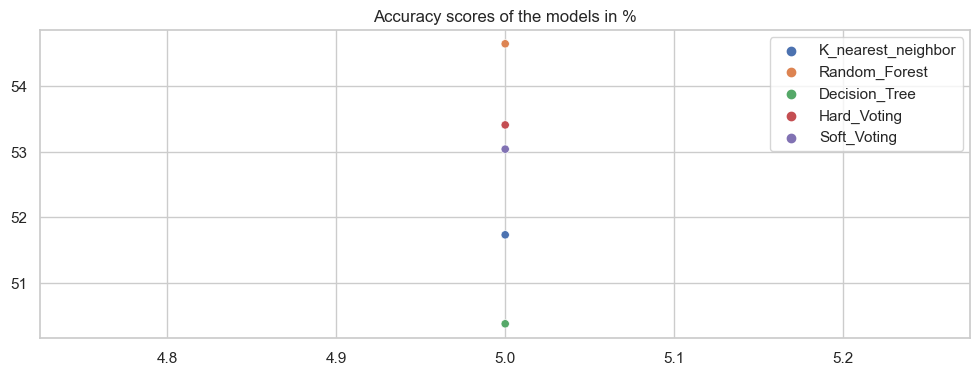

In [100]:

labels=["K_nearest_neighbor", "Random_Forest", "Decision_Tree", "Hard_Voting", "Soft_Voting"]


fig, ax = plt.subplots(figsize=(12,4))
sns.set(style='whitegrid')

y= models_acc_scores
x=len(y)

sns.scatterplot(x=x, y=y, hue=labels)


 
plt.title("Accuracy scores of the models in %")
plt.legend(loc="best")
plt.savefig("Accuracy_scores.png", bbox_inches='tight')
plt.show()

In [101]:
print(f"The baseline for this problem is the accuracy score that we calculated for our first model which is {round(acc_score * 100, 2)}% and we have successfully developed models that have better accuracy scores!") 

The baseline for this problem is the accuracy score that we calculated for our first model which is 48.57% and we have successfully developed models that have better accuracy scores!


Conclusion:
While the voting classifier gives us a majority from the predictions of classifiers passed to it, and theoretically should give us a better score, but because it scored lower on the validation set with a score lower than that of the random forest, we will not consider it for our final model.

Chosen model is : Random Forest classifier!

